In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


Unique target values before encoding: [0 1 2 3]


C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


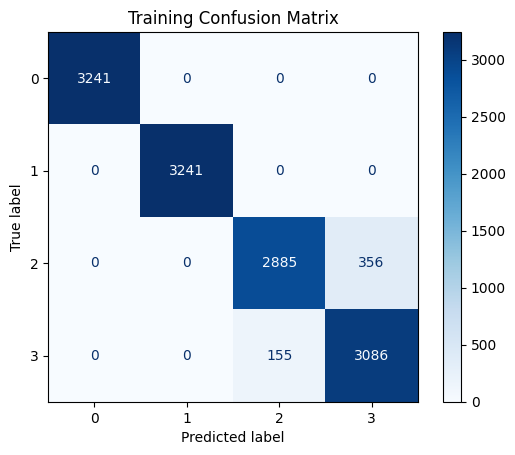

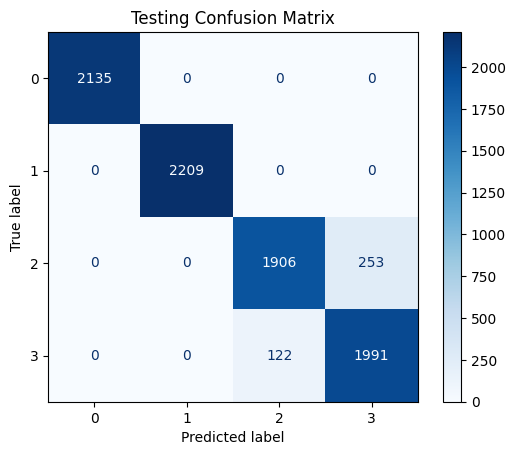

Training Accuracy: 0.9606
Testing Accuracy: 0.9565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2135
           1       1.00      1.00      1.00      2209
           2       0.94      0.88      0.91      2159
           3       0.89      0.94      0.91      2113

    accuracy                           0.96      8616
   macro avg       0.96      0.96      0.96      8616
weighted avg       0.96      0.96      0.96      8616



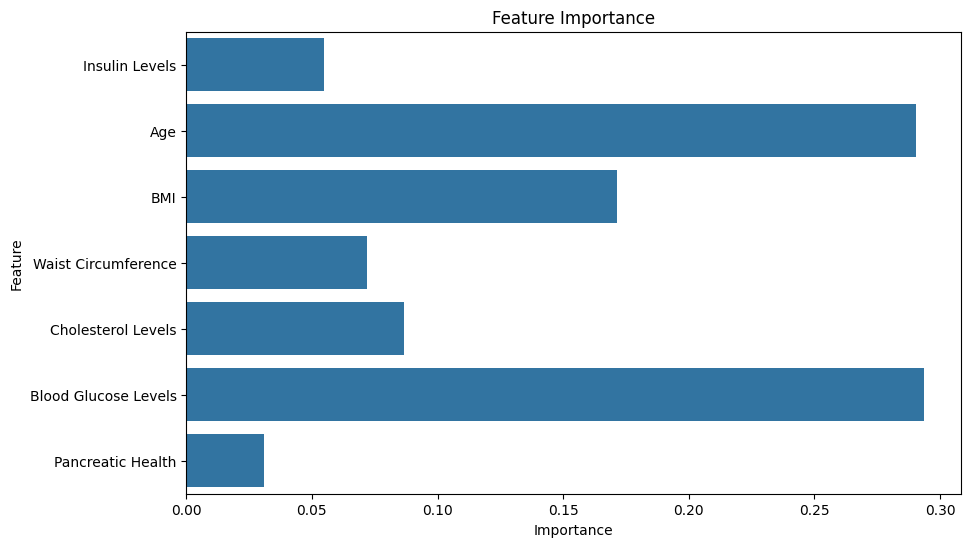

C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are no

Cross-validation Accuracy: 0.9550


<Figure size 2000x1000 with 0 Axes>

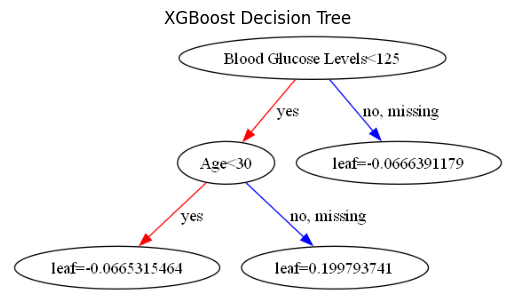

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
)
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the data
data_path = 'data.csv'
data = pd.read_csv(data_path)

# Inspect the unique values in the target column
print("Unique target values before encoding:", data['Target'].unique())

# Feature-target separation
X = data.drop(columns=['Target'])  # Drop the target column
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# XGBoost parameters
xgb_params = {
    'n_estimators': 96,
    'max_depth': 6,
    'min_child_weight': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'scale_pos_weight': 1,
    'eval_metric': 'mlogloss',
    'random_state': 42
}

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize and train XGBoost classifier
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train_res, y_train_res)

# Training predictions, confusion matrix, and accuracy
y_train_pred = xgb.predict(X_train_res)
train_cm = confusion_matrix(y_train_res, y_train_pred)
train_accuracy = accuracy_score(y_train_res, y_train_pred)

# Display training confusion matrix
cmd_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=np.unique(y))
cmd_train.plot(cmap='Blues')
plt.title("Training Confusion Matrix")
plt.show()

# Testing predictions, confusion matrix, and accuracy
y_test_pred = xgb.predict(X_test)
test_cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display testing confusion matrix
cmd_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=np.unique(y))
cmd_test.plot(cmap='Blues')
plt.title("Testing Confusion Matrix")
plt.show()

# Print training and testing accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report for testing data
print(classification_report(y_test, y_test_pred))

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Cross-validation accuracy
cv_scores = cross_val_score(xgb, X_train_res, y_train_res, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

# ======================= DECISION TREE PLOTTING ======================= #

# Plot a single tree from the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(xgb, num_trees=0)
plt.title("XGBoost Decision Tree")
plt.show()

